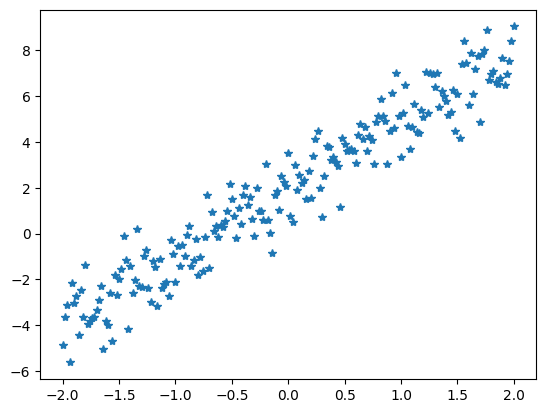

In [66]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT * FROM `growyxprod.firebase_projects.post_schema_projectPositions_latest`
    """
)

result = query_job.result()

tensor = []

for row in result:
    # print(type(row.positions_member))
    if (type(row.positions_member) == str):
        tensor.append(json.loads(row.positions_member))

print(tensor[1400])

df = pd.json_normalize(tensor)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
df['database'] = df['database'].fillna('[]')
df['database'] = ','.join(df['database'][0])
df['databases'] = df['databases'].fillna('[]')
df['databases'] = ','.join(df['databases'][0])
df['methodology'] = df['methodology'].fillna('[]')
df['methodology'] = ','.join(df['methodology'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
df.shape
# df.head()


{'codeLanguage': ['Kotlin', 'Laravel'], 'codeLanguageForProjectBriefView': ['Kotlin', 'Laravel'], 'database': ['Microsoft SQL Server'], 'databaseForProjectBriefView': ['Microsoft SQL Server'], 'expertise': 'Sênior', 'hourValue': 175, 'jobSpecifications': 'Temos um sistema que consiste em interface WEB e Mobile (Andoride), precismos corrigir 3 bugs na interface WEB, uma featura na interface WEB e um bug na interface mobile ', 'jobTitle': 'developer mobile', 'methodology': ['Kanban'], 'methodologyForProjectBriefView': ['Kanban'], 'ongoingDate': {'_seconds': 1679686978, '_nanoseconds': 456000000}, 'skills': [], 'skillsForProjectBriefView': [], 'softwares': ['Github'], 'softwaresForProjectBriefView': ['Github'], 'totalHour': 20, 'wageMax': 80, 'wageMin': 50}


(1482, 87)

In [2]:
df = df[['codeLanguage','database','jobTitle','skills','softwares', 'hourValue']]

In [3]:
df.shape

(1482, 6)

In [4]:

selecteds_query_job = client.query(
    """
    SELECT quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest` LIMIT 2000
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,20.000000000,11.000000000,20.000000000,15.000000000,86.000000000,20.000000000,None,BRL,50,...,100.000000000,100.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
2,None,15.000000000,15.000000000,15.000000000,16.000000000,78.000000000,17.000000000,None,BRL,150,...,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,80.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
ks.shape

(2000, 40)

In [6]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,20.000000000,11.000000000,20.000000000,15.000000000,86.000000000,20.000000000,None,50,25.000000000,...,100.000000000,100.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,100.000000000
2,None,15.000000000,15.000000000,15.000000000,16.000000000,78.000000000,17.000000000,None,150,33.000000000,...,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,80.000000000,100.000000000,60.000000000,100.000000000,80.000000000
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
ks.shape

(2000, 36)

In [8]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,ND,,ND,ND
1,BRL,developer back-end,Sênior,Full-time
2,BRL,,Sênior,Full-time
3,ND,ND,ND,ND
4,ND,developer full-stack,,part-time


In [9]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_BRL,wages_currency_EUR,wages_currency_ND,wages_currency_USD,experience_jobTitle_,experience_jobTitle_Grower,experience_jobTitle_ND,experience_jobTitle_account executive,experience_jobTitle_administrador de banco dados,experience_jobTitle_advogada,...,experience_level_selecione...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce', downcast="integer")
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_selecione...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,20,11,20,15,86,20,0,50.0,25,...,0,0,0,1,0,0,0,0,0,0
2,0,15,15,15,16,78,17,0,150.0,33,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:

categ = pd.get_dummies(df, dtype=int)
categ.head()

,codeLanguage_React,database_,jobTitle_0,jobTitle_Agile coach,jobTitle_Data engineer,jobTitle_DevOps engineer,jobTitle_Developer back-end,jobTitle_Developer front-end,jobTitle_Developer full-stack,jobTitle_Developer mobile,...,hourValue_203,hourValue_215,hourValue_230,hourValue_240,hourValue_245,hourValue_250,hourValue_300,hourValue_500,hourValue_,"hourValue_39,37"
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
categ.shape

(1482, 167)

In [13]:
import numpy as np

new_dt = []
cols = []
# print(ks.values)
for i in range(1482):
    new_dt.append(ks.values)
    cols.append(str(i))

pd_ndt = np.array(new_dt)
print(pd_ndt.shape)


(1482, 2000, 136)


In [14]:
indexes = []
ind2 = []
for i in range(1482):
    indexes.append(i)
    ind2.append(i)

idex = np.array(indexes)
idex2 = np.array(ind2)
np.random.shuffle(idex)

np.random.shuffle(idex2)
print(idex2)
print(idex)


[1318 1155 1243 ...  192 1142  122]
[ 192 1398  448 ...  329 1393  646]


In [15]:
idex.shape

(1482,)

[(None, 167), (None, 2000, 136)] (None, 2000)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 2000, 136)]          0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 2000, 60)             8220      ['input_2[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 2000, 15)             915       ['dense_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 2000, 8)              128       ['dense_6[0][0]']             
                                              

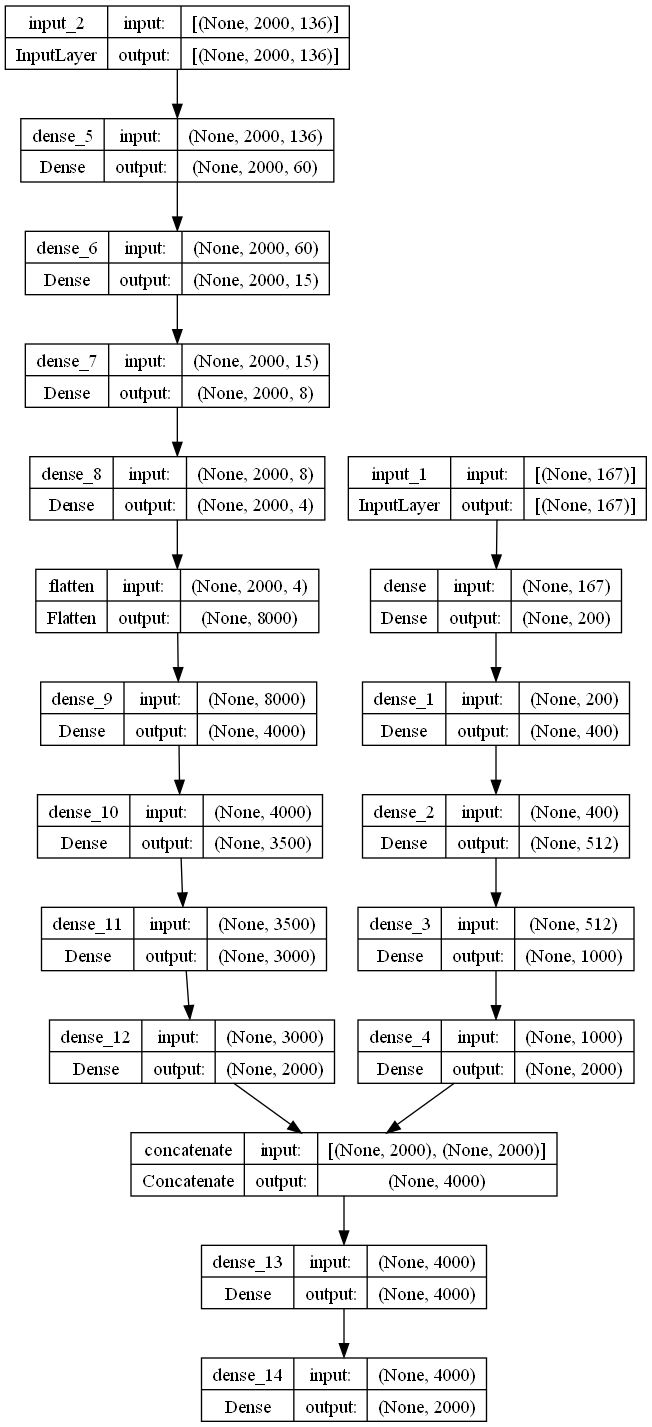

In [16]:
from tensorflow import keras

slot_input = keras.Input(shape=(167,))
pro_input = keras.Input(shape=(2000,136))
HIDEN_ACTIVATION = "relu"

x = keras.layers.Dense(200, activation=HIDEN_ACTIVATION) (slot_input)
x = keras.layers.Dense(400, activation=HIDEN_ACTIVATION) (x)
x = keras.layers.Dense(512, activation=HIDEN_ACTIVATION) (x)
x = keras.layers.Dense(1000, activation=HIDEN_ACTIVATION) (x)
x = keras.layers.Dense(2000, activation=HIDEN_ACTIVATION) (x)
x = keras.Model(inputs=slot_input, outputs=x)

y = keras.layers.Dense(60, activation=HIDEN_ACTIVATION) (pro_input)
y = keras.layers.Dense(15, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(8, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(4, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Flatten() (y)
y = keras.layers.Dense(4000, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(3500, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(3000, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(2000, activation=HIDEN_ACTIVATION) (y)
# y = keras.layers.Dense(512, activation=HIDEN_ACTIVATION) (y)
y = keras.Model(inputs=pro_input, outputs=y)

combine = keras.layers.concatenate([x.output, y.output])

z = keras.layers.Dense(4000, activation=HIDEN_ACTIVATION) (combine)
z = keras.layers.Dense(2000, activation="softmax") (z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

print(model.input_shape, model.output_shape)

model.compile(
      optimizer=keras.optimizers.Adamax(1e-3),
      loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
      metrics=[keras.metrics.SparseCategoricalCrossentropy()]
)

model.summary()

keras.utils.plot_model(model, "first_model.png", True)

In [17]:
# dtst = keras.utils.to_categorical(dataset.choose_from_datasets(dataset, [0]), dtype="float32")
history = model.fit([categ, pd_ndt], idex, epochs=28, validation_data=([categ, pd_ndt], idex2))

Epoch 1/28


d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - ETA: 0s - loss: 8.3854 - sparse_categorical_crossentropy: 8.3854

d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 88s 2s/step - loss: 8.3854 - sparse_categorical_crossentropy: 8.3854 - val_loss: 7.5954 - val_sparse_categorical_crossentropy: 7.5954
Epoch 2/28
47/47 [==============================] - 68s 1s/step - loss: 7.5920 - sparse_categorical_crossentropy: 7.5920 - val_loss: 7.5541 - val_sparse_categorical_crossentropy: 7.5541
Epoch 3/28
47/47 [==============================] - 67s 1s/step - loss: 7.5391 - sparse_categorical_crossentropy: 7.5391 - val_loss: 7.4437 - val_sparse_categorical_crossentropy: 7.4437
Epoch 4/28
47/47 [==============================] - 71s 2s/step - loss: 7.4298 - sparse_categorical_crossentropy: 7.4298 - val_loss: 7.3864 - val_sparse_categorical_crossentropy: 7.3864
Epoch 5/28
47/47 [==============================] - 79s 2s/step - loss: 7.3665 - sparse_categorical_crossentropy: 7.3665 - val_loss: 7.3402 - val_sparse_categorical_crossentropy: 7.3402
Epoch 6/28
47/47 [==============================] - 66s 1s/step - loss: 7.3227 - 

{'loss': [8.385404586791992, 7.591981887817383, 7.539125919342041, 7.429818153381348, 7.366469383239746, 7.322661876678467, 7.154045581817627, 6.747588157653809, 6.292372226715088, 5.835045337677002, 5.441654205322266, 5.135847091674805, 4.848011493682861, 4.62926721572876, 4.42899227142334, 4.2786149978637695, 4.1404218673706055, 3.978361129760742, 3.8901662826538086, 3.7786197662353516, 3.6932833194732666, 3.6344497203826904, 3.5833475589752197, 3.5000991821289062, 3.4373199939727783, 3.397174835205078, 3.3371057510375977, 3.296229839324951], 'sparse_categorical_crossentropy': [8.385404586791992, 7.591981887817383, 7.539125919342041, 7.429818153381348, 7.366469383239746, 7.322661876678467, 7.154045581817627, 6.747588157653809, 6.292372226715088, 5.835045337677002, 5.441654205322266, 5.135847091674805, 4.848011493682861, 4.62926721572876, 4.42899227142334, 4.2786149978637695, 4.1404218673706055, 3.978361129760742, 3.8901662826538086, 3.7786197662353516, 3.6932833194732666, 3.634449720

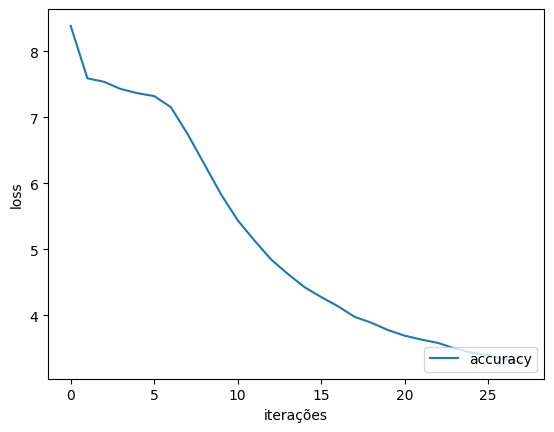

In [18]:
import matplotlib.pyplot as plt

print(history.history)
plt.plot(history.history['loss'], label='accuracy')
# plt.plot(history.history['logcosh'], label= 'logcosh')
plt.xlabel('iterações')
plt.ylabel('loss')
# plt.ylim([1,10])
plt.legend(loc='lower right')

test_loss, test_acc, *outros = model.evaluate([categ, pd_ndt], idex, verbose=2)

In [57]:
test = categ.iloc[18:22]
print(test.shape)
# mt = np.matrix([pd_ndt[0]])
# print(mt.shape)
side = np.array([pd_ndt[0], pd_ndt[0], pd_ndt[0], pd_ndt[0]])

predition = model.predict([test, side])

(4, 167)
1/1 [==============================] - 0s 139ms/step


In [64]:
candidate_index = np.argmax(predition[3])

print(predition[3][candidate_index], candidate_index)

0.015524954 644


In [65]:
print(df.iloc[candidate_index]['jobTitle'])
strData.iloc[21]['experience_jobTitle']

developer back-end


'devops engineer'